(Material adapted from Toke Faurby and Chris Carvelli's) 

# Lab2 Preprocessing

The objectives of this lab is for you to get:
* familiar with the repository structure
* an introduction / reminder to Pandas
* experience with loading, validating, and visualizing data.

## Quick note on the labs
The labs will be made available on [GitHub](https://github.com/Bhik95/data-mining-exercises) on a roling basis.
Be sure to have the most recent version locally by pulling from the repo.
This can be done from the notebook by using the cell below.
Remove the comment symbol `#` and run the cell (`Ctrl` + `Enter`).
`!` tells the notebook to run the command in the terminal, instead of in the Python interpreter.

In [55]:
# ! git pull

In [56]:
# Makes matplotlib plots work better with Jupyter
%matplotlib inline

# Import the necessary libraries. 
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1: Loading the data

> Estimated task time: 10 minutes.

The first this first assignment you must 

1) load the data in `./data/Data-Mining-Spring-2018.csv` using **`pandas`**.
Pandas is an open-source Python library providing high-performance, easy-to-use data structures and data analysis tools.
It is very popular among data scientists and statisticians as it allows you to work very quickly and efficiently.
 * Have a look at the `pandas.read_csv` function.

2) Make sense of the data by printing the first 10 values. Determine the number of observations and features in the data, and have a quick look at what data types they are (or should be).
* Pandas dataframes have the `head` method that is useful printing a limited number of observations.

In [58]:
# Check that data and data path is present
basedir = "./"
assert os.path.isdir(basedir+"data") and os.path.exists(basedir + "data/Data-Mining-Spring-2018.csv"), 'Data not found. Make sure to have the most recent version!'


In [59]:
## YOUR CODE HERE 
data = pd.read_csv('data\Data-Mining-Spring-2018.csv', delimiter=',')
data.head(10)

,Timestamp,Age,Gender,Shoe Size,Height,What degree are you studying?,Why are you taking this course?,Which programming languages do you know?,Which phone OS do you prefer?,Which topics would you prefer to learn in this course? [Design efficient databases for large amounts of data],...,In which order do you normally traverse these ITU locations? [14 checkpoint],In which order do you normally traverse these ITU locations? [15 checkpoint],Write four (4) random numbers between 0 and 15,therb fortt glag,Pick a number,Favorite film?,Favorite TV-Show,Favorite Game,Which row are you sitting/did you sit in during the introduction lecture?,Which seat are you sitting/did you sit on during the introduction lecture?
0,2018/01/28 12:19:34 PM GMT+1,27,Male,41,173.7,SDT-SE,I am interested in the subject,"C#, Java, Scala",Android,Sounds interesting,...,Not at ITU,Not at ITU,"1,2,3,4",NaN,9,"Pearl Harbor, Terminator, Hercules",Game of thrones,Grand Theft Auto - All versions,B,4
1,2018/01/28 12:45:16 PM GMT+1,29,Male,42,192,SDT-DT,This was a mandatory course for me,"Java, Python",iOS,Meh,...,Not at ITU,Not at ITU,"3,4,2,1",NaN,Asparagus,Manhunt,Deadline,Foobar,A,0
2,2018/01/28 2:17:47 PM GMT+1,24,Man,"42,5",180,SDT-DT,I am interested in the subject,Java,Android,Sounds interesting,...,Not at ITU,Not at ITU,"1,6,0,9",Option 1,7,Blade Runner 2049,Game Of Thrones,FIFA 18,C,5
3,2018/01/28 3:14:16 PM GMT+1,28,male,45,191,SDT-DT,I am interested in the subject,Java,iOS,Very interesting,...,Atrium,Basement,"5,3,6,8",Option 1,13,Terminator 2,Games Of Thrones,Witcher,B,5
4,2018/01/28 3:41:47 PM GMT+1,28,Male,43,172,SDT-DT,I am interested in the subject,"Java, R",Windows,Sounds interesting,...,Not at ITU,Not at ITU,"6,9,7,1",Option 1,Asparagus,Braindead,"Game of Thrones, Hannibal","Dark Souls, Dark Souls III",F,0
5,2018/01/28 5:51:00 PM GMT+1,99,King Gizzard and the Lizzard Wizard,44.66,19,SDT-DT,I need to learn about data mining in order to ...,"Java, Python, Haskell, LizardPRO",iOS,Sounds interesting,...,Not at ITU,Not at ITU,0 0 0 0,Option 1,9,"ET, Disctrict 9, Independence Day, Contact",Stranger Things,A game,A,0
6,2018/01/28 7:30:08 PM GMT+1,24,Male,45,185,SDT-DT,I am interested in the subject,Java,Android,Meh,...,Not at ITU,Not at ITU,"1, 3, 5, 7",NaN,9,Mean girls,"Friends, Moden Family",Hearthstone,C,7
7,2018/01/28 9:33:20 PM GMT+1,30,Male,"47,5",186,GAMES-T,This was a mandatory course for me,"C#, C++, HTML, Python",Android,Meh,...,Not at ITU,Not at ITU,"7,8,5,10",NaN,13,Serenity,Serenity,Serenity,A,8
8,2018/01/28 9:57:18 PM GMT+1,27,male,40,168,GAMES-T,This was a mandatory course for me,C++,Android,Sounds interesting,...,Basement,Not at ITU,1，15，5，7,NaN,9,The Lord of the Rings,Black Mirror,World of Warcraft,C,3
9,2018/01/29 10:02:13 AM GMT+1,Twenty-three,NaN,Forty-five,Around 195,SDT-SE,Why should I?,"Java, C#, Swift, F#, Typescript, C, PHP, SQL, ...",Android,Sounds interesting,...,Not at ITU,Not at ITU,"0,0,0,0",NaN,13,Sharknodo 5,Breaking bad,Fortnite,C9,9


## Task 2: Cleaning the data

> Estimated task time: 10 minutes.

We don't want to work with all the features for this exercise.

1) Select a subset of the features, as defined by `feature_sub` (cell below).

2) Rename the columns, such that `What degree are you studying?` becomes `Degree`, and `Shoe Size` becomes `ShoeSize`. Not having spaces (or long names) makes it easier to work with the data in `pandas`.
 * Look at the `rename` method.

3) Convert the columns to the appropriate data formats (e.g. `Age` should be a float, and `Gender` should be a string).
 * `to_numeric` is a useful method (but not the only way) to convert strings to numerical values, and the `errors` argument can be used to handle errors.
 * `dropna` can be used to remove `nan` values.


In [60]:
feature_sub = ['Age', 'Gender', 'Shoe Size', 'Height', 'What degree are you studying?']

In [62]:
## YOUR CODE HERE
data = data.rename(columns={"What degree are you studying?": "Degree", "Shoe Size": "ShoeSize"})

data.head(10)

,Timestamp,Age,Gender,ShoeSize,Height,Degree,Why are you taking this course?,Which programming languages do you know?,Which phone OS do you prefer?,Which topics would you prefer to learn in this course? [Design efficient databases for large amounts of data],...,In which order do you normally traverse these ITU locations? [14 checkpoint],In which order do you normally traverse these ITU locations? [15 checkpoint],Write four (4) random numbers between 0 and 15,therb fortt glag,Pick a number,Favorite film?,Favorite TV-Show,Favorite Game,Which row are you sitting/did you sit in during the introduction lecture?,Which seat are you sitting/did you sit on during the introduction lecture?
0,2018/01/28 12:19:34 PM GMT+1,27,Male,41,173.7,SDT-SE,I am interested in the subject,"C#, Java, Scala",Android,Sounds interesting,...,Not at ITU,Not at ITU,"1,2,3,4",NaN,9,"Pearl Harbor, Terminator, Hercules",Game of thrones,Grand Theft Auto - All versions,B,4
1,2018/01/28 12:45:16 PM GMT+1,29,Male,42,192,SDT-DT,This was a mandatory course for me,"Java, Python",iOS,Meh,...,Not at ITU,Not at ITU,"3,4,2,1",NaN,Asparagus,Manhunt,Deadline,Foobar,A,0
2,2018/01/28 2:17:47 PM GMT+1,24,Man,"42,5",180,SDT-DT,I am interested in the subject,Java,Android,Sounds interesting,...,Not at ITU,Not at ITU,"1,6,0,9",Option 1,7,Blade Runner 2049,Game Of Thrones,FIFA 18,C,5
3,2018/01/28 3:14:16 PM GMT+1,28,male,45,191,SDT-DT,I am interested in the subject,Java,iOS,Very interesting,...,Atrium,Basement,"5,3,6,8",Option 1,13,Terminator 2,Games Of Thrones,Witcher,B,5
4,2018/01/28 3:41:47 PM GMT+1,28,Male,43,172,SDT-DT,I am interested in the subject,"Java, R",Windows,Sounds interesting,...,Not at ITU,Not at ITU,"6,9,7,1",Option 1,Asparagus,Braindead,"Game of Thrones, Hannibal","Dark Souls, Dark Souls III",F,0
5,2018/01/28 5:51:00 PM GMT+1,99,King Gizzard and the Lizzard Wizard,44.66,19,SDT-DT,I need to learn about data mining in order to ...,"Java, Python, Haskell, LizardPRO",iOS,Sounds interesting,...,Not at ITU,Not at ITU,0 0 0 0,Option 1,9,"ET, Disctrict 9, Independence Day, Contact",Stranger Things,A game,A,0
6,2018/01/28 7:30:08 PM GMT+1,24,Male,45,185,SDT-DT,I am interested in the subject,Java,Android,Meh,...,Not at ITU,Not at ITU,"1, 3, 5, 7",NaN,9,Mean girls,"Friends, Moden Family",Hearthstone,C,7
7,2018/01/28 9:33:20 PM GMT+1,30,Male,"47,5",186,GAMES-T,This was a mandatory course for me,"C#, C++, HTML, Python",Android,Meh,...,Not at ITU,Not at ITU,"7,8,5,10",NaN,13,Serenity,Serenity,Serenity,A,8
8,2018/01/28 9:57:18 PM GMT+1,27,male,40,168,GAMES-T,This was a mandatory course for me,C++,Android,Sounds interesting,...,Basement,Not at ITU,1，15，5，7,NaN,9,The Lord of the Rings,Black Mirror,World of Warcraft,C,3
9,2018/01/29 10:02:13 AM GMT+1,Twenty-three,NaN,Forty-five,Around 195,SDT-SE,Why should I?,"Java, C#, Swift, F#, Typescript, C, PHP, SQL, ...",Android,Sounds interesting,...,Not at ITU,Not at ITU,"0,0,0,0",NaN,13,Sharknodo 5,Breaking bad,Fortnite,C9,9


## Visualizing the Data
Now that we have `Age`, `ShoeSize`, and `Height` as numerical we can start visualizing it.
Simple visualizations, like histograms are an easy way to get a sense of the data, check for outliers, faulty or anything else we need to take care of.

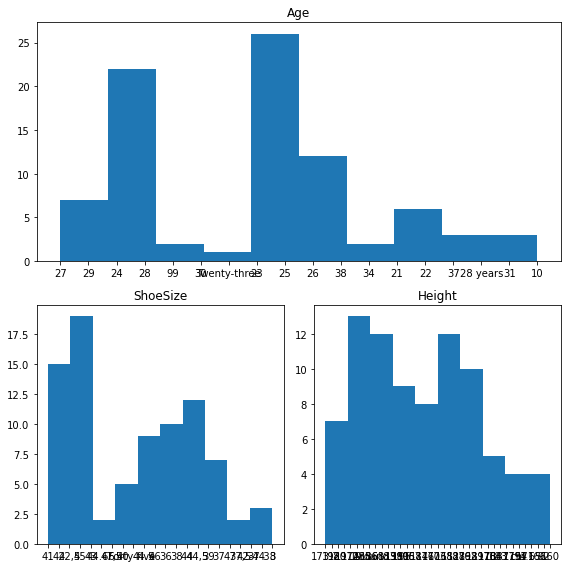

In [63]:
def hist_plot(data):
    plt.figure(figsize=[8,8])

    plt.subplot(211)
    plt.hist(data.Age.values)
    plt.title("Age")

    plt.subplot(223)
    plt.hist(data.ShoeSize.values)
    plt.title("ShoeSize")

    plt.subplot(224)
    plt.hist(data.Height.values)
    plt.title("Height")

    plt.tight_layout()
    plt.show()

hist_plot(data)

## Task 3: Remove Invalid values

> Estimated task time: 15 minutes.

In the histograms above we see that several values seem suspicious, e.g. a height of 19 cm is probably not true.
In this exercise your job is to remove the faulty observations.
This is ofcourse fundamentally a subjective taks, where you will have to rely on your domain knowledge.

1) Remove the observations with invalid data points.
 * `df.where`/`df.mask` in conjunction with `dropna` can be useful for these kinds of operations.

2) Visualize the data again. If it still looks strange go back to 1)


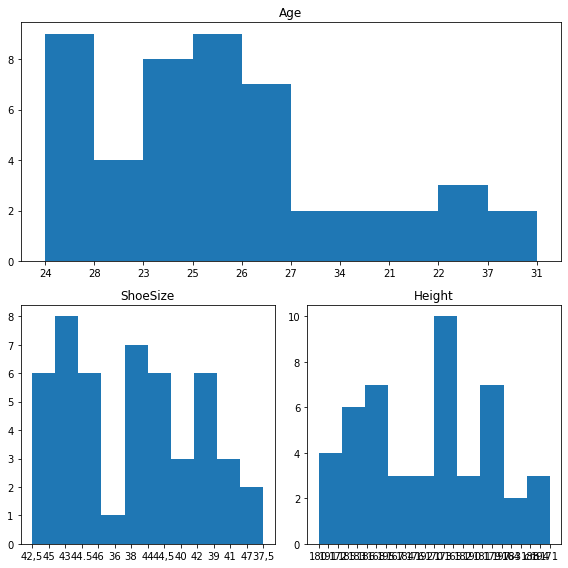

In [122]:
## YOUR CODE HERE
test_data = data.where((data["Height"].str.split()).apply(lambda x: float(x[0].replace(',', '').replace('Around', '0'))).astype('float') > 120.0).dropna()

hist_plot(test_data)

## Task 4: Convert Gender to Integers

> Estimated task time: 15 minutes.

We often prefer working with integer class labels, rather than strings. 
As you can see the gender has been specified in several different ways, so you need to do some work making the data interpretable.
For this task you should:

1) Create a new column called `GenderNumerical` with 0's for males, 1's for females, and 2's for other.
 * Define a function that interprets the `Gender` string, and returns the appropriate number.
  * Python distinguishes between upper and lower case, so when working with strings it can sometimes help converting everything to lower case.
 * Use `df.apply` to apply the function to every element in the dataframe.

2) Determine the ratio of the three gender categories.


In [125]:
print("Values in the 'Gender' column:")
print(np.unique(data['Gender']))

Values in the 'Gender' column:
['Alpha male' 'F' 'Female' 'Fluid' 'M' 'Make' 'Male' 'Man' 'female' 'male']


In [126]:
def determine_gender_numerical(string):
    if (string == "Alpha male" or string == "F" or string == "M" or string.lower() == "male" or "Man"):
        return 0
    elif(string == "F", string.lower() == "female"):
        return 1
    else:
        return 2


## Scatter plot visualization

Now that we removed the faulty observations in the data we can visualize it further.
As long as the number of features is small a pair plot is an easy way to quickly get an overview of relationships between the different features.

We can make such a plot easily using `seaborn`, a popular visualization library.
It is based on `matplotlib`, but provides a higher-level API, making it one of the easiest ways to make pretty plots.
It also has nice `pandas` integration, as shown below.
Another cool python library to look into is [`bokeh`](https://bokeh.pydata.org).
It allows you to easily create interactive plots.

**Question**: What relationships do you see in the data?

In [129]:
sns.pairplot(data, hue="Degree", diag_kind='hist')
# diag_kind='hist' is necessary when you have small classes, as kde-plot fails for classes with one observation.

plt.show()

ValueError: Number of rows must be a positive integer, not 0

## Task 5: Normalize Data

> Estimated task time: 10 minutes.

For the last task you must normalize the data.
Many data science methods require that we first normalize the data.
Typically we would want to use a library (e.g. `sklearn.preprocessing.normalize`), but for this task you should do it yourself.


1) Make a new DataFrame, `data_norm`, where all the floating point columns are normalized using to zero mean and unit (1) variance using the following equation:
$$
x_{norm} = \frac{x-\mu}{\sigma}
$$

2) Add the `Degree` column to the normalized DataFrame.

In [ ]:
data_norm = data_sub
## YOUR CODE HERE


## PCA Visualization

One example of a method that requires normalization is Principal Component Analsysis (PCA).
PCA is a popular visualization technique, as it allows you to project high dimensional data into a low dimensional space.
This is usefull for reducing the number of features, or for visualizing features.

A simple PCA plot that projects 'Age', 'ShoeSize', 'GenderNumerical' down into 2 dimensions is performed below.
If we color the dots with the remaining two attributes 'Degree' and 'Height' we see that PCA doesn't seem to separate 'Degree', where as 'Height' is separated somewhat nicely.


In [ ]:
from sklearn.decomposition import PCA

data_as_numpy = data_norm[['Age', 'ShoeSize', 'GenderNumerical']].values
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_as_numpy)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

principalDf['Degree'] = data_sub.Degree.values
principalDf['Height'] = data_sub.Height.values

sns.scatterplot(data=principalDf, x='PC1', y='PC2', hue='Degree')
plt.show()

sns.scatterplot(data=principalDf, x='PC1', y='PC2', hue='Height', palette='RdBu')
plt.show()